# Análise das Bases


Vamos agora mostrar algumas análises que podem ser feitas nos dados.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
users = pd.read_csv('users_airbnb.csv')
countries = pd.read_csv('countries.csv')
consolida = pd.merge(users, countries, left_on='country_destination', right_on='country_destination', how='left')

consolida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 22 columns):
id                               213451 non-null object
date_account_created             213451 non-null object
timestamp_first_active           213451 non-null int64
date_first_booking               88908 non-null object
gender                           213451 non-null object
age                              125461 non-null float64
signup_method                    213451 non-null object
signup_flow                      213451 non-null int64
language                         213451 non-null object
affiliate_channel                213451 non-null object
affiliate_provider               213451 non-null object
first_affiliate_tracked          207386 non-null object
signup_app                       213451 non-null object
first_device_type                213451 non-null object
first_browser                    213451 non-null object
country_destination              213451 non-null ob

## Exploração de *missings*

In [ ]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

## Quartis

In [3]:
users.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [4]:
print(sum(users.age > 43))
print(sum(users.age < 28))

30310
26076


In [6]:
users[users.age > 43]['age'].describe()

count    30310.000000
mean       107.207192
std        309.571878
min         44.000000
25%         47.000000
50%         53.000000
75%         62.000000
max       2014.000000
Name: age, dtype: float64

In [7]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

## Convertendo os tipos de dados

In [8]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [9]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [13]:
users.country_destination.describe()

count     213451
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object

In [14]:
users.date_account_created.describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

## Visualização

## Histogramas

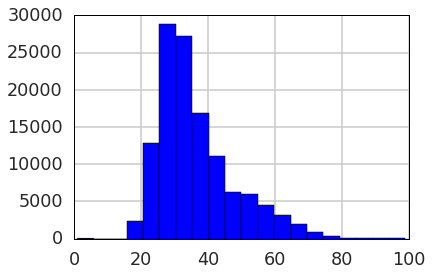

In [36]:
users[users.age < 100].age.hist(bins=20)

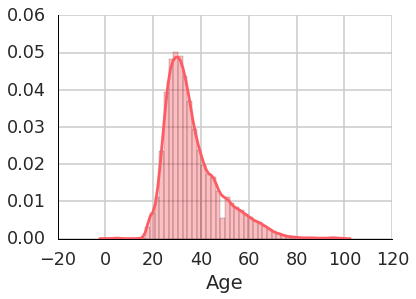

In [38]:
sns.distplot(users[users.age < 100].age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

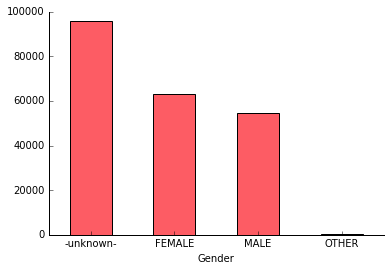

In [18]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

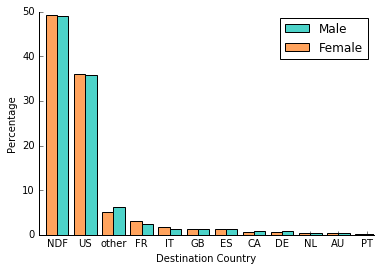

In [19]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [22]:
destination_percentage = users.country_destination.value_counts() / users.shape[0] * 100
destination_percentage

NDF      58.347349
US       29.222632
other     4.728954
FR        2.353233
IT        1.328174
GB        1.088774
ES        1.053638
CA        0.669006
DE        0.497070
NL        0.356991
AU        0.252517
PT        0.101663
dtype: float64

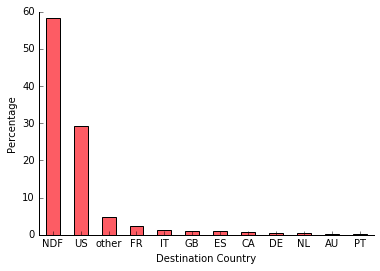

In [23]:
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

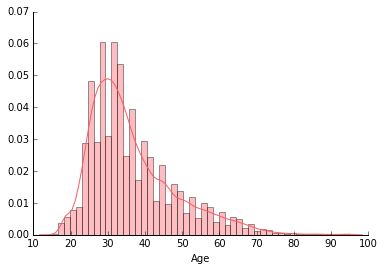

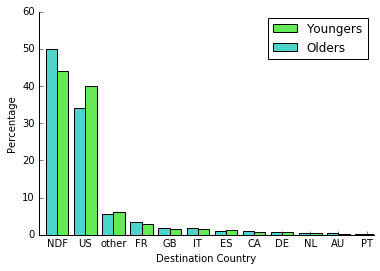

In [25]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [26]:
print((sum(users.language == 'en') / users.shape[0])*100)

96.6563754679


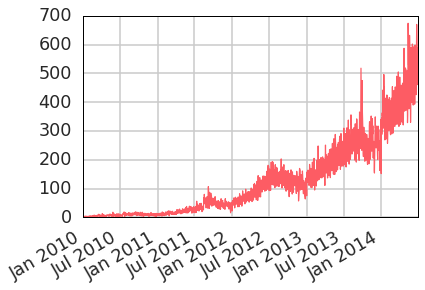

In [27]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

In [28]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

In [29]:
weekdays

0         0
1         2
2         1
3         0
4         1
5         4
6         5
7         6
8         0
9         0
10        0
11        1
12        1
13        1
14        3
15        3
16        3
17        3
18        4
19        6
20        6
21        6
22        0
23        0
24        0
25        1
26        1
27        1
28        2
29        2
         ..
213421    0
213422    0
213423    0
213424    0
213425    0
213426    0
213427    0
213428    0
213429    0
213430    0
213431    0
213432    0
213433    0
213434    0
213435    0
213436    0
213437    0
213438    0
213439    0
213440    0
213441    0
213442    0
213443    0
213444    0
213445    0
213446    0
213447    0
213448    0
213449    0
213450    0
dtype: int64

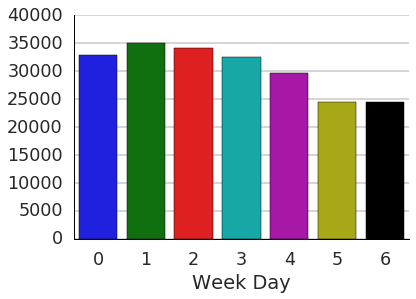

In [30]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

(10, 60)

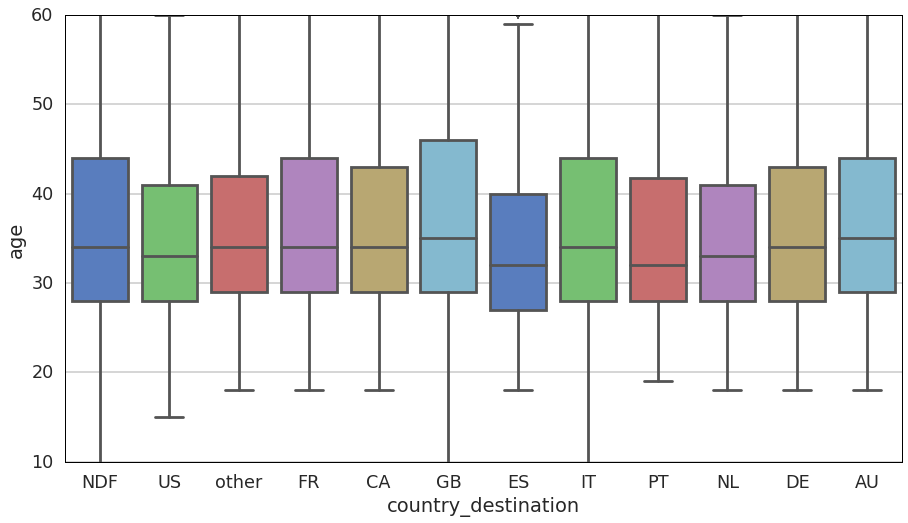

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=users, palette="muted", ax =ax)
ax.set_ylim([10, 60])

In [43]:
ctab = pd.crosstab([users['gender']], users.country_destination).apply(lambda x: x/x.sum(), axis=1)

In [44]:
ctab

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,0.001494,0.005131,0.002968,0.007472,0.017902,0.007922,0.010869,0.696744,0.002372,0.000721,0.210152,0.036253
FEMALE,0.003284,0.007218,0.005679,0.013531,0.031123,0.013975,0.017306,0.492505,0.004029,0.001237,0.359988,0.050126
MALE,0.003453,0.008762,0.007641,0.012436,0.024522,0.012528,0.012840,0.490797,0.005107,0.001267,0.357403,0.063244
OTHER,0.003546,0.017730,0.010638,0.014184,0.046099,0.010638,0.017730,0.375887,0.010638,0.003546,0.411348,0.078014


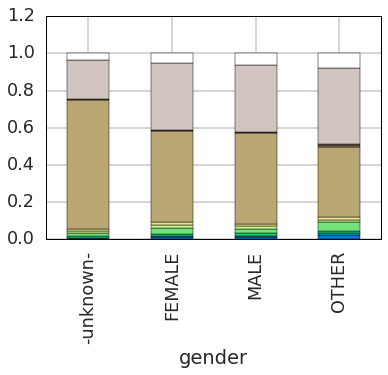

In [51]:
ctab.plot(kind='bar', stacked=True,legend=False, colormap='terrain')

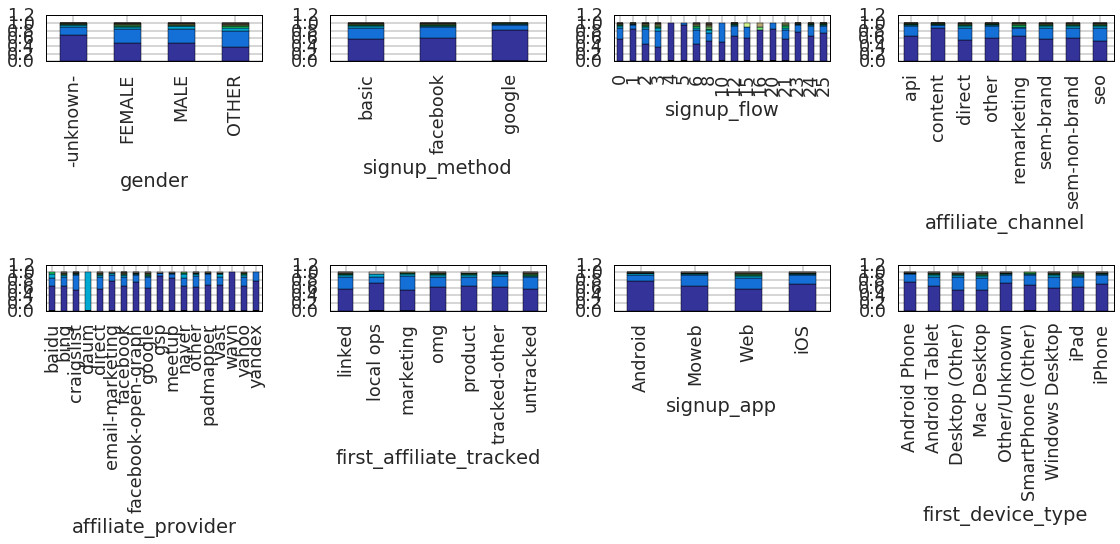

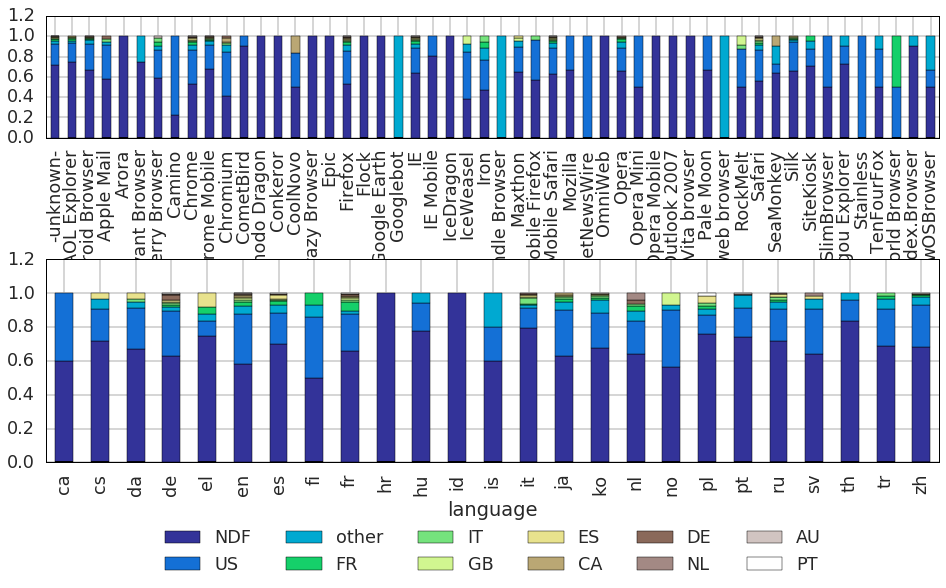

In [42]:
bar_order = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
cat_vars = ['gender', 'signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider', 
            'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'language']
from matplotlib.colors import Colormap
fig, ax4 = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
def pltCatVar(var,axis,ax_num):
    ctab = pd.crosstab([users[var]], users.country_destination).apply(lambda x: x/x.sum(), axis=1)
    ctab[bar_order].plot(kind='bar', stacked=True, ax=axis.reshape(-1)[ax_num],legend=False, 
                         colormap='terrain')
for i,var in enumerate(cat_vars[:8]):
    pltCatVar(var,ax4,i)
plt.tight_layout()
fig, ax5 = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharey=True)
for i,var in enumerate(cat_vars[8:]):
    pltCatVar(var,ax5,i)
box = ax5[0].get_position()
ax5[0].set_position([box.x0, box.y0 + box.height * 0.4, box.width, box.height * 0.6])
ax5[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)